In [ ]:
import warnings; warnings.simplefilter('ignore')
import nltk

try:
    import google.colab
    IN_COLAB = True
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataDDGsna.py
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/contoh.pdf
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_id.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_en.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/kata_dasar.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-ind-def.tab
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-msa-all.tab
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/ind_SA.csv
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/all_indo_man_tag_corpus_model.crf.tagger

    !pip install --upgrade spacy python-crfsuite unidecode textblob sastrawi sklearn-pycrfsuite
    !pip install --upgrade unidecode twython tweepy beautifulsoup4 tika
    !python -m spacy download en
    !python -m spacy download xx
    !python -m spacy download en_core_web_sm
    nltk.download('popular')
except:
    IN_COLAB = False
    print("Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded")

--2022-06-10 14:46:58--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataDDGsna.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8030 (7.8K) [text/plain]
Saving to: ‘taudataDDGsna.py’

taudataDDGsna.py    100%[===================>]   7.84K  --.-KB/s    in 0s      

2022-06-10 14:46:58 (81.2 MB/s) - ‘taudataDDGsna.py’ saved [8030/8030]

--2022-06-10 14:46:58--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/contoh.pdf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 221233 (21

In [ ]:
import taudataDDGsna as tau
import tweepy, json, urllib.request, requests
from urllib.request import Request, urlopen
from twython import TwythonStreamer
from bs4 import BeautifulSoup as bs
from tqdm import tqdm
"Done"

'Done'

In [ ]:
Ck = 'p76aa3SQdGXG6KlOFB2rlEYN8' # consumer_key
Cs = '7QY41F7LK449lKVUoi1sKlZidq6ALYVh4FEKQj2Ph6XmT4IN7N' # consumer_secret
At = '529202222-MB1NLjJGxeZA6gKiiDFaHrPMVdGid1oOp7ZwDXyL' # access_token
As = '1Yali9pzlbHyMRq5ta5FAPu1KQ4r2UsS6ujZGfXbNQxFo' # access_secret

'Done'

'Done'

In [ ]:
import tweepy

auth = tweepy.auth.OAuthHandler(Ck, Cs)
auth.set_access_token(At, As)
api = tweepy.API(auth, wait_on_rate_limit=True, timeout=180, retry_count=5, retry_delay=3)
usr_ = api.verify_credentials()
print('Welcome, you are now connected to twitter server')

Welcome, you are now connected to twitter server


In [ ]:
status = "Tweet Digital Data Gathering - Kuliah EVDA"
t = api.update_status(status)
# Silahkan cek timeline setelah ini
"Done! ... Silahkan cek timeline twitter anda."

'Done! ... Silahkan cek timeline twitter anda.'

In [ ]:
qry = 'mie gacoan'
N = 1000 # jumlah N tweet "terkini" yang ingin diambil
T = []
for post in tqdm(tweepy.Cursor(api.search_tweets, q=qry, lang='id', tweet_mode='extended').items(N)):
    T.append(post)

"Done"

1000it [00:15, 64.82it/s]


'Done'

In [ ]:
T[0]._json

{'contributors': None,
 'coordinates': None,
 'created_at': 'Fri Jun 10 00:15:23 +0000 2022',
 'display_text_range': [0, 24],
 'entities': {'hashtags': [],
  'symbols': [],
  'urls': [{'display_url': 'twitter.com/Art0fLife_/sta…',
    'expanded_url': 'https://twitter.com/Art0fLife_/status/1534802161623769088',
    'indices': [25, 48],
    'url': 'https://t.co/rsGOOkBNjA'}],
  'user_mentions': []},
 'favorite_count': 0,
 'favorited': False,
 'full_text': 'Mie Gacoan kok ga ada :( https://t.co/rsGOOkBNjA',
 'geo': None,
 'id': 1535052974560378881,
 'id_str': '1535052974560378881',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': True,
 'lang': 'in',
 'metadata': {'iso_language_code': 'in', 'result_type': 'recent'},
 'place': None,
 'possibly_sensitive': False,
 'quoted_status': {'contributors': None,
  'coordinates': None,
  'created_at': 'Thu Jun 09 07

In [ ]:
# T bukan sekedar list of tweets
tweet = [t._json for t in T]
print(' Berhasil mendapatkan {} tweets'.format(len(tweet)))

 Berhasil mendapatkan 1000 tweets


In [ ]:
# Data pertama
tweet[0]

{'contributors': None,
 'coordinates': None,
 'created_at': 'Fri Jun 10 00:15:23 +0000 2022',
 'display_text_range': [0, 24],
 'entities': {'hashtags': [],
  'symbols': [],
  'urls': [{'display_url': 'twitter.com/Art0fLife_/sta…',
    'expanded_url': 'https://twitter.com/Art0fLife_/status/1534802161623769088',
    'indices': [25, 48],
    'url': 'https://t.co/rsGOOkBNjA'}],
  'user_mentions': []},
 'favorite_count': 0,
 'favorited': False,
 'full_text': 'Mie Gacoan kok ga ada :( https://t.co/rsGOOkBNjA',
 'geo': None,
 'id': 1535052974560378881,
 'id_str': '1535052974560378881',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': True,
 'lang': 'in',
 'metadata': {'iso_language_code': 'in', 'result_type': 'recent'},
 'place': None,
 'possibly_sensitive': False,
 'quoted_status': {'contributors': None,
  'coordinates': None,
  'created_at': 'Thu Jun 09 07

In [ ]:
# Datanya berbentuk JSON
tweet[0]['created_at'], tweet[0]['full_text']

('Fri Jun 10 00:15:23 +0000 2022',
 'Mie Gacoan kok ga ada :( https://t.co/rsGOOkBNjA')

In [ ]:
# Contoh mengakses data spesifik pada tweet yang pertama:
print('tweet pertama oleh "{}" : "{}"'.format(tweet[0]['user']['screen_name'],tweet[0]['full_text']))

tweet pertama oleh "BukanPegawaiJP" : "Mie Gacoan kok ga ada :( https://t.co/rsGOOkBNjA"


Menyimpan hasil crawling (sederhana ke Text file berformat json)

In [ ]:
import json
def saveTweets(tweets, file='Tweets.json'): #in Json Format
    with open(file, 'w') as f:
        for t in tweets:
            try:
                f.write(json.dumps(t)+'\n')
            except:
                pass

In [ ]:
# Menyimpan hasil crawling twitter
fileName = 'Tweets_Mie_Gacoan.json'
saveTweets(tweet, file=fileName)
print('Saved to '+fileName)

Saved to Tweets_Mie_Gacoan.json


Reload From Json File

In [ ]:
def loadTweets(file='Tweets_Mie_Gacoan.json'):
    f=open(file,encoding='utf-8', errors ='ignore', mode='r')
    T=f.readlines();f.close()
    for i,t in enumerate(T):
        T[i] = json.loads(t.strip())
    return T

In [ ]:
# Me-load kembali jika (misal) analisa ingin dilakukan di lain waktu
# Sengaja nama variabelnya saya bedakan (T2)
T2 = loadTweets(file=fileName)
print('tweet pertama oleh "{}" : "{}"'.format(T2[0]['user']['screen_name'],T2[0]['full_text']))

tweet pertama oleh "idntimes" : "Malas antri? Langsung buat aja di rumah https://t.co/SCTC0m7IrM"


In [ ]:
# Contoh mengambil hanya data tweet
D = [t['full_text'] for t in T2]
D[:5] # 5 tweet pertama

['Malas antri? Langsung buat aja di rumah https://t.co/SCTC0m7IrM',
 'Kemarin nasgor dan mie goreng sekarang mie gacoan dan rawon🤤\nAlhamdulillah',
 '@trstywt @5ecretNumber malah aku yg pengen mie gacoan, soal nya belum pernah ngerasain😌',
 'kalo stress obatnya apa?\nyak betul mie gacoan 🍌',
 'rodok curiga lek tbtb ngajak ke tempat yang haruse gak doi banget gini, beberapa kali mau ke gacoan mesti mek di puterno tok alasan "makanan mie ae ramene nggilani, makan laine ae" dan berujung makan ramen 😭 https://t.co/lh9MIld17F']

In [ ]:
# Mari kita coba #1
topic = 'from:mie_gacoan'
T = api.search_tweets(q=topic, lang='id', tweet_mode = 'extended')
tweet = [t._json for t in T]
isiTweet = [t['full_text'] for t in tweet]
isiTweet

['Isi survey bisa makan MIE GACOAN GRATIS!? 😆\nPeriode survey 10 - 30 juni 2022 &amp; dapatkan 5 voucher utk yg beruntung ( voucher @/25K ) \n\nCaranya?\n- Klik link di bio mimin\n- Pilih SURVEY PELAYANAN\n- Isi nama &amp; no hp kalian dg benar\n- Isi setiap pertanyaan\n\nGampang banget bukan? 😉 https://t.co/eGO6xDt6fU',
 '@cirengsotong Wah terima kasih banyak udah order Mie Gacoan kak 😆\nSelamat menikmati, kita tunggu orderannya lagi ya 😉',
 '@resamaulidya Hai kak, doain ya semoga Mie Gacoan bisa segera hadir di Sukabumi 😉',
 '@beyinmra Sini, mimin tungguin 😉',
 '@Fikafatchu_r Seneng banget udah mampir ke Mie Gacoan 😆\nTerima kasih kak dan selamat menikmati. Kita tunggu kedatangannya lagi ya 😉',
 '@sadturrnus_ Wah terima kasih udah mampir ke Mie Gacoan kak. Kita tunggu kedatangannya lagi ya 😉',
 '@sashitsmi Hi kak, Mie Gacoan Madiun is located on Jl. Kapten Saputra No.37, Kejuron, Kec. Taman, Kota Madiun, East Java. We will wait for you 😉',
 '@taku_mle Hai kak, doain ya semoga Mie Gac

Convert JSON to CSV

In [ ]:
import pandas as pd
df = pd.read_json ('Tweets_Mie_Gacoan.json', lines=True)
df.to_csv ('Tweets_Mie_Gacoan.csv', index = None)

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import string
import re

In [ ]:
# Load dataset
def load_data():
    data = pd.read_csv('Tweets_Mie_Gacoan.csv')
    return data

tweet_df = load_data()
tweet_df.columns

Index(['id_str', 'full_text', 'Label'], dtype='object')

In [ ]:
tweet_mie_gacoan = tweet_df[['id_str', 'full_text']]

In [ ]:
tweet_mie_gacoan.to_excel('tweet_mie_gacoan.xlsx',encoding='utf8', index=False)

In [ ]:
tweet_mie_gacoan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id_str     1000 non-null   int64 
 1   full_text  1000 non-null   object
 2   Label      1000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 23.6+ KB


#Sentiment

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Load dataset
def load_data():
    data = pd.read_excel('tweet_mie_gacoan.xlsx')
    return data

tweet_sentiment_df = load_data()

In [ ]:
# dependent variable, misal 1=positif, -1=negatif
labels = tweet_sentiment_df['label']
dic = {1:'positif', -1:'negatif'}
print([dic[c] for c in labels])

['negatif', 'positif', 'positif', 'positif', 'positif', 'positif', 'positif', 'positif', 'positif', 'positif', 'negatif', 'positif', 'negatif', 'positif', 'negatif', 'negatif', 'positif', 'positif', 'positif', 'negatif', 'positif', 'positif', 'positif', 'positif', 'positif', 'positif', 'negatif', 'positif', 'positif', 'positif', 'positif', 'positif', 'positif', 'positif', 'negatif', 'positif', 'positif', 'positif', 'positif', 'positif', 'positif', 'positif', 'positif', 'negatif', 'positif', 'positif', 'positif', 'negatif', 'positif', 'positif', 'positif', 'positif', 'positif', 'positif', 'positif', 'positif', 'positif', 'positif', 'positif', 'negatif', 'negatif', 'positif', 'positif', 'positif', 'positif', 'positif', 'positif', 'positif', 'positif', 'positif', 'positif', 'positif', 'positif', 'positif', 'positif', 'negatif', 'positif', 'positif', 'negatif', 'negatif', 'positif', 'positif', 'positif', 'positif', 'positif', 'positif', 'positif', 'positif', 'positif', 'positif', 'negatif'

#remove User

In [ ]:
#=========================================================================#
#remove user
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt
tweet_sentiment_df['remove_user'] = np.vectorize(remove_pattern)(tweet_sentiment_df['full_text'], "@[\w]*")

In [ ]:
#=========================================================================#
def remove(tweet):
    #remove angka
    tweet = re.sub('[0-9]+', '', tweet)

    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)

    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)

    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    return tweet
tweet_sentiment_df['remove_http'] = tweet_sentiment_df['remove_user'].apply(lambda x: remove(x))
tweet_sentiment_df.sort_values("remove_http", inplace = True)
tweet_sentiment_df.drop_duplicates(subset ="remove_http", keep = 'first', inplace = True)

In [ ]:
#=========================================================================#
 #import stopword
from nltk.corpus import stopwords
stopwords_indonesia = stopwords.words('indonesian')

#import sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

#tokenize
from nltk.tokenize import TweetTokenizer

# Happy Emoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])

# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])

# all emoticons (happy + sad)
emoticons = emoticons_happy.union(emoticons_sad)

In [ ]:
def clean_tweets(tweet):
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)

    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)

    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)

    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)

    #remove coma
    tweet = re.sub(r',','',tweet)

    #remove angka
    tweet = re.sub('[0-9]+', '', tweet)

    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_indonesia and # remove stopwords
              word not in emoticons and # remove emoticons
                word not in string.punctuation): # remove punctuation
            #tweets_clean.append(word)
            stem_word = stemmer.stem(word) # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean
tweet_sentiment_df['tweet_clean'] = tweet_sentiment_df['remove_http'].apply(lambda x: clean_tweets(x))

In [ ]:
#=========================================================================#
#remove punct
def remove_punct(text):
    text  = " ".join([char for char in text if char not in string.punctuation])
    return text
tweet_sentiment_df['Tweet'] = tweet_sentiment_df['tweet_clean'].apply(lambda x: remove_punct(x))

In [ ]:
tweet_sentiment_df.head()

,id_str,label,Tweet
388,1534357185634790000,1,suka yg iblis sih kecthupnya
387,1534357668013520000,1,bener sih manis manis pedes gituh laper
946,1533401256764450000,1,krn blm mkn mie gaco
17,1534891926859630000,1,ajak makan mie gaco
403,1534319951036700000,1,mie gaco bersetifikasi halal


In [ ]:
tweet_sentiment_df.drop('tweet_clean', axis=1, inplace=True)
tweet_sentiment_df.drop('remove_http', axis=1, inplace=True)
tweet_sentiment_df.drop('remove_user', axis=1, inplace=True)
tweet_sentiment_df.drop('full_text', axis=1, inplace=True)

In [ ]:
#=========================================================================#
tweet_sentiment_df.sort_values("Tweet", inplace = True)
tweet_sentiment_df.drop_duplicates(subset ="Tweet", keep = 'first', inplace = True)
tweet_sentiment_df.to_csv('Tweet_After_Cleaning.csv',encoding='utf8', index=False)
tweet_sentiment_df.head()

,id_str,label,Tweet
30,1534876042716130000,1,
520,1534120910168260000,-1,a
754,1533720066038330000,1,aaa sama nawaitu dpt udang keju gratis
118,1534795729180720000,1,aamiin admin
560,1534068850048010000,1,aamiin kak tunggu bgt loch


In [ ]:
#Mengubah Tipe Data "id_str" menjadi String
tweet_sentiment_df['id_str'] = tweet_sentiment_df['id_str'].astype(str)

In [ ]:
import copy

In [ ]:
tweet_sentiment_df.drop("id_str", axis=1, inplace=True)

In [ ]:
tweet_sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 907 entries, 30 to 133
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   907 non-null    int64 
 1   Tweet   907 non-null    object
dtypes: int64(1), object(1)
memory usage: 21.3+ KB


#Preprocessing

In [ ]:
tweet_sentiment_df['tweet_cleaned'] = ''
tweet_sentiment_df.head()

,label,Tweet,tweet_cleaned
30,1,,
520,-1,a,
754,1,aaa sama nawaitu dpt udang keju gratis,
118,1,aamiin admin,
560,1,aamiin kak tunggu bgt loch,


In [ ]:
stopId, lemmaId = tau.LoadStopWords(lang='id')
for i, d in tqdm(tweet_sentiment_df.iterrows()):
    doc = tau.cleanText(d.Tweet, lemma=lemmaId, stops = None, symbols_remove = True, min_charLen = 2, fixTag= True)
    tweet_sentiment_df.at[i, "tweet_cleaned"] = doc

tweet_sentiment_df.head()

907it [04:34,  3.30it/s]


,label,Tweet,tweet_cleaned
30,1,,
520,-1,a,
754,1,aaa sama nawaitu dpt udang keju gratis,aa sama nawaitu dpt udang keju gratis
118,1,aamiin admin,aamiin admin
560,1,aamiin kak tunggu bgt loch,aamiin kak tunggu bgt loch


In [ ]:
from sklearn.model_selection import train_test_split

seed = 99 # Biasakan menggunakan ini
testSize = 0.2

x_train, x_test, y_train, y_test = train_test_split(tweet_sentiment_df["tweet_cleaned"], tweet_sentiment_df["label"],
                                                    test_size=testSize, random_state = seed)
print(x_train.shape, x_test.shape)

(725,) (182,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vsm = TfidfVectorizer(lowercase=True, smooth_idf= True, sublinear_tf=True,
                                   ngram_range=(1, 2), max_df=0.90, min_df=2)

x_train = vsm.fit_transform(x_train) # "Fit_Transform"
x_test = vsm.transform(x_test) # Perhatikan disini hanya "Transform"

print(x_train.shape, x_test.shape) # Jumlah kolom Sama ==> ini penting

(725, 1192) (182, 1192)


In [ ]:
# dependent variable, misal 1=positif, -1=negatif
positive = 0
negative = 0
labels = tweet_sentiment_df['label']
for c in labels:
  if c == 1:
    positive = positive + 1
  else:
    negative = negative + 1
print(negative)
print(positive)

159
748


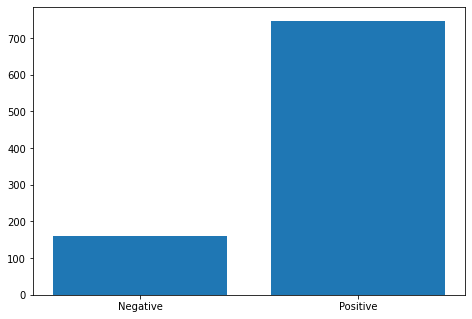

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
value = ['Negative', 'Positive']
sentiment = [negative, positive]
ax.bar(value, sentiment)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#Document Classification ~ Sentiment Analysis

In [ ]:
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

model = neighbors.KNeighborsClassifier()
kNN = model.fit(x_train, y_train)
y_kNN = kNN.predict(x_test)

print('Akurasi = ', accuracy_score(y_test, y_kNN))
print(confusion_matrix(y_test, y_kNN))
print(classification_report(y_test, y_kNN))

Akurasi =  0.8406593406593407
[[  3  28]
 [  1 150]]
              precision    recall  f1-score   support

          -1       0.75      0.10      0.17        31
           1       0.84      0.99      0.91       151

    accuracy                           0.84       182
   macro avg       0.80      0.55      0.54       182
weighted avg       0.83      0.84      0.79       182



In [ ]:
from sklearn import svm

dSVM = svm.SVC()
dSVM.fit(x_train, y_train)
y_SVM = dSVM.predict(x_test)
print('Akurasi = ', accuracy_score(y_test, y_SVM))
print(confusion_matrix(y_test, y_SVM))
print(classification_report(y_test, y_SVM))

Akurasi =  0.8241758241758241
[[  0  31]
 [  1 150]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        31
           1       0.83      0.99      0.90       151

    accuracy                           0.82       182
   macro avg       0.41      0.50      0.45       182
weighted avg       0.69      0.82      0.75       182



In [ ]:
from sklearn.neural_network import MLPClassifier

NN = MLPClassifier()
NN.fit(x_train, y_train)
y_NN = NN.predict(x_test)

print('Akurasi = ', accuracy_score(y_test, y_NN))
print(confusion_matrix(y_test, y_NN))
print(classification_report(y_test, y_NN))

Akurasi =  0.8021978021978022
[[ 10  21]
 [ 15 136]]
              precision    recall  f1-score   support

          -1       0.40      0.32      0.36        31
           1       0.87      0.90      0.88       151

    accuracy                           0.80       182
   macro avg       0.63      0.61      0.62       182
weighted avg       0.79      0.80      0.79       182



#Optimasi Parameter

In [ ]:
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import make_pipeline

In [ ]:
# Optimal parameter k-NN dengan GRIDSEARCH
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

x_train, x_test, y_train, y_test = train_test_split(tweet_sentiment_df_example["tweet_cleaned"], tweet_sentiment_df_example["label"],
                                                    test_size=testSize, random_state = seed)
# Perhatikan kita pakai data awal : Text karena kita akan optimalkan preprocessing juga

kCV = 5
metric = 'accuracy'
params = {}
params['tfidfvectorizer__min_df'] = [5, 10, 15]
params['tfidfvectorizer__max_df'] = [0.5, 0.75, 0.95]
params['tfidfvectorizer__smooth_idf'] = [True] # [True, False]
params['tfidfvectorizer__sublinear_tf'] = [True] # [True, False]
params['tfidfvectorizer__ngram_range'] = [(1, 1), (1, 2), (1,3)]
params['kneighborsclassifier__n_neighbors'] = [3, 5, 10]
params['kneighborsclassifier__weights'] = ('distance', 'uniform')

pipe = make_pipeline(TfidfVectorizer(), neighbors.KNeighborsClassifier())
gridCV = GridSearchCV(pipe, params, cv=kCV, scoring=metric, verbose=1, n_jobs=-1) # , pre_dispatch='2*n_jobs', pre_dispatch min 2* n_jobs
gridCV.fit(x_train, y_train)
print(gridCV.best_score_)
print(gridCV.best_params_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
0.8262068965517241
{'kneighborsclassifier__n_neighbors': 10, 'kneighborsclassifier__weights': 'distance', 'tfidfvectorizer__max_df': 0.95, 'tfidfvectorizer__min_df': 10, 'tfidfvectorizer__ngram_range': (1, 2), 'tfidfvectorizer__smooth_idf': True, 'tfidfvectorizer__sublinear_tf': True}


In [ ]:
# Optimal parameter SVM dengan RandomSEARCH
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

pipeSVM = make_pipeline(TfidfVectorizer(), svm.SVC())
print(sorted(pipeSVM.get_params().keys()))

['memory', 'steps', 'svc', 'svc__C', 'svc__break_ties', 'svc__cache_size', 'svc__class_weight', 'svc__coef0', 'svc__decision_function_shape', 'svc__degree', 'svc__gamma', 'svc__kernel', 'svc__max_iter', 'svc__probability', 'svc__random_state', 'svc__shrinking', 'svc__tol', 'svc__verbose', 'tfidfvectorizer', 'tfidfvectorizer__analyzer', 'tfidfvectorizer__binary', 'tfidfvectorizer__decode_error', 'tfidfvectorizer__dtype', 'tfidfvectorizer__encoding', 'tfidfvectorizer__input', 'tfidfvectorizer__lowercase', 'tfidfvectorizer__max_df', 'tfidfvectorizer__max_features', 'tfidfvectorizer__min_df', 'tfidfvectorizer__ngram_range', 'tfidfvectorizer__norm', 'tfidfvectorizer__preprocessor', 'tfidfvectorizer__smooth_idf', 'tfidfvectorizer__stop_words', 'tfidfvectorizer__strip_accents', 'tfidfvectorizer__sublinear_tf', 'tfidfvectorizer__token_pattern', 'tfidfvectorizer__tokenizer', 'tfidfvectorizer__use_idf', 'tfidfvectorizer__vocabulary', 'verbose']


In [ ]:
# Optimal parameter SVM dengan RandomizedSearch

paramsSVM = {}
paramsSVM['tfidfvectorizer__min_df'] = [5, 10, 30]
paramsSVM['tfidfvectorizer__max_df'] = [0.5, 0.75, 0.95]
paramsSVM['tfidfvectorizer__smooth_idf'] = [True] # [True, False]
paramsSVM['tfidfvectorizer__sublinear_tf'] = [True] # [True, False]
paramsSVM['tfidfvectorizer__ngram_range'] = [(1, 1), (1, 2), (1,3)]
paramsSVM['svc__C'] = [0.1, 10, 100] #sp.stats.uniform(scale=1)
paramsSVM['svc__gamma'] = [1.0, 0.1, 0.001]
paramsSVM['svc__kernel'] = ['rbf', 'poly', 'sigmoid', 'linear']
paramsSVM['svc__decision_function_shape'] = ['ovo', 'ovr']

randsvmCV = RandomizedSearchCV(pipeSVM, paramsSVM, cv=kCV, scoring=metric, verbose=1, n_iter=30, random_state=seed, n_jobs=-1) # , pre_dispatch='2*n_jobs' pre_dispatch min 2* n_jobs
randsvmCV.fit(x_train, y_train)
print(randsvmCV.best_score_)
print(randsvmCV.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
0.8234482758620689
{'tfidfvectorizer__sublinear_tf': True, 'tfidfvectorizer__smooth_idf': True, 'tfidfvectorizer__ngram_range': (1, 2), 'tfidfvectorizer__min_df': 30, 'tfidfvectorizer__max_df': 0.75, 'svc__kernel': 'poly', 'svc__gamma': 0.001, 'svc__decision_function_shape': 'ovr', 'svc__C': 0.1}


In [ ]:
# Optimal parameter ANN dengan RandomSEARCH
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

pipeNN = make_pipeline(TfidfVectorizer(), MLPClassifier())
print(sorted(pipeNN.get_params().keys()))

['memory', 'mlpclassifier', 'mlpclassifier__activation', 'mlpclassifier__alpha', 'mlpclassifier__batch_size', 'mlpclassifier__beta_1', 'mlpclassifier__beta_2', 'mlpclassifier__early_stopping', 'mlpclassifier__epsilon', 'mlpclassifier__hidden_layer_sizes', 'mlpclassifier__learning_rate', 'mlpclassifier__learning_rate_init', 'mlpclassifier__max_fun', 'mlpclassifier__max_iter', 'mlpclassifier__momentum', 'mlpclassifier__n_iter_no_change', 'mlpclassifier__nesterovs_momentum', 'mlpclassifier__power_t', 'mlpclassifier__random_state', 'mlpclassifier__shuffle', 'mlpclassifier__solver', 'mlpclassifier__tol', 'mlpclassifier__validation_fraction', 'mlpclassifier__verbose', 'mlpclassifier__warm_start', 'steps', 'tfidfvectorizer', 'tfidfvectorizer__analyzer', 'tfidfvectorizer__binary', 'tfidfvectorizer__decode_error', 'tfidfvectorizer__dtype', 'tfidfvectorizer__encoding', 'tfidfvectorizer__input', 'tfidfvectorizer__lowercase', 'tfidfvectorizer__max_df', 'tfidfvectorizer__max_features', 'tfidfvector

In [ ]:
paramsNN = {}
paramsNN['tfidfvectorizer__min_df'] = [5, 10, 30]
paramsNN['tfidfvectorizer__max_df'] = [0.5, 0.75, 0.95]
paramsNN['tfidfvectorizer__smooth_idf'] = [True] # [True, False]
paramsNN['tfidfvectorizer__sublinear_tf'] = [True] # [True, False]
paramsNN['tfidfvectorizer__ngram_range'] = [(1, 1), (1, 2), (1,3)]
paramsNN['mlpclassifier__hidden_layer_sizes'] = [(5,10), (20,30), (30,50)]
paramsNN['mlpclassifier__learning_rate'] = ['constant', 'invscaling', 'adaptive']
paramsNN['mlpclassifier__activation'] = ['logistic', 'tanh', 'relu' ]

randNnCV = RandomizedSearchCV(pipeNN, paramsNN, cv=kCV, scoring=metric, verbose=1, n_iter=30, random_state=seed, n_jobs=-1) # , pre_dispatch='2*n_jobs' pre_dispatch min 2* n_jobs
randNnCV.fit(x_train, y_train)
print(randNnCV.best_score_)
print(randNnCV.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
0.8248275862068966
{'tfidfvectorizer__sublinear_tf': True, 'tfidfvectorizer__smooth_idf': True, 'tfidfvectorizer__ngram_range': (1, 3), 'tfidfvectorizer__min_df': 5, 'tfidfvectorizer__max_df': 0.75, 'mlpclassifier__learning_rate': 'adaptive', 'mlpclassifier__hidden_layer_sizes': (20, 30), 'mlpclassifier__activation': 'logistic'}


#Model Selection

In [ ]:
knn_score = gridCV.cv_results_['mean_test_score'][:10]
svm_score = randsvmCV.cv_results_['mean_test_score'][:10]
ann_score = randNnCV.cv_results_['mean_test_score'][:10]
ann_score

array([0.79310345, 0.76827586, 0.8137931 , 0.82068966, 0.80965517,
       0.81655172, 0.82344828, 0.7737931 , 0.79172414, 0.75448276])

Accuracy kNN: 0.79 (+/- 0.04)
Accuracy SVM: 0.81 (+/- 0.04)
Accuracy NN: 0.80 (+/- 0.05)


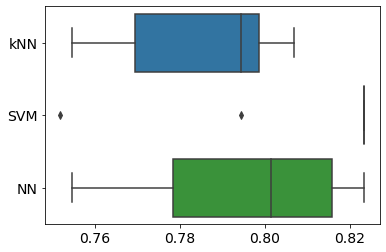

In [ ]:
import seaborn as sns, matplotlib.pyplot as plt

models = ['kNN', 'SVM', 'NN']
scores = [knn_score, svm_score, ann_score]

data = {m:s for m,s in zip(models, scores)}
for name in data.keys():
    print("Accuracy %s: %0.2f (+/- %0.2f)" % (name, data[name].mean(), data[name].std() * 2))

sns.boxplot(data=pd.DataFrame(data), orient='h')
plt.show()

#Ensemble Model

###“meta-algorithms” : Bagging & Boosting

In [ ]:
# Contoh Voting (Bagging) di Python
# Kita menggunakan semua parameter optimal dari langkah sebelumnya
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier

x_train, x_test, y_train, y_test = train_test_split(tweet_sentiment_df_example["tweet_cleaned"], tweet_sentiment_df_example["label"],
                                                    test_size=testSize, random_state = seed)

vsm = TfidfVectorizer(lowercase=True, smooth_idf= True, sublinear_tf=True,
                                   ngram_range=(1, 1), max_df=0.95, min_df=10)

x_train = vsm.fit_transform(x_train) # "Fit_Transform"
x_test = vsm.transform(x_test) # Perhatikan disini hanya "Transform"

kNN = neighbors.KNeighborsClassifier(n_neighbors=10, weights='distance')
SVM = svm.SVC(C=0.1, gamma=1, kernel='rbf', decision_function_shape='ovr')
ann = MLPClassifier(hidden_layer_sizes=(5, 10), learning_rate='invscaling', activation='logistic')

ensemble = VotingClassifier(estimators=[('k-NN', kNN), ('SVM', SVM), ('ANN', ann)], voting='hard')
ensemble.fit(x_train, y_train)
y_ens = ensemble.score(x_test, y_test)

print('Akurasi k-NN = ', gridCV.best_score_)
print('Akurasi SVM = ', randsvmCV.best_score_)
print('Akurasi ANN = ', randNnCV.best_score_)
print('Akurasi Ensemble = ', y_ens)

Akurasi k-NN =  0.8262068965517241
Akurasi SVM =  0.8234482758620689
Akurasi ANN =  0.8248275862068966
Akurasi Ensemble =  0.8296703296703297


In [ ]:
kNN = neighbors.KNeighborsClassifier(n_neighbors=10, weights='distance')
SVM = svm.SVC(C=0.1, gamma=1, kernel='rbf', decision_function_shape='ovr', probability=True)
ann = MLPClassifier(hidden_layer_sizes=(5, 10), learning_rate='invscaling', activation='logistic')

ensemble = VotingClassifier(estimators=[('k-NN', kNN), ('SVM', SVM), ('ANN', ann)], voting='soft')
ensemble.fit(x_train, y_train)
y_ens = ensemble.score(x_test, y_test)

print('Akurasi k-NN = ', gridCV.best_score_)
print('Akurasi SVM = ', randsvmCV.best_score_)
print('Akurasi ANN = ', randNnCV.best_score_)
print('Akurasi Ensemble = ', y_ens)

Akurasi k-NN =  0.8262068965517241
Akurasi SVM =  0.8234482758620689
Akurasi ANN =  0.8248275862068966
Akurasi Ensemble =  0.8241758241758241


[[ 86  42]
 [  0 597]]


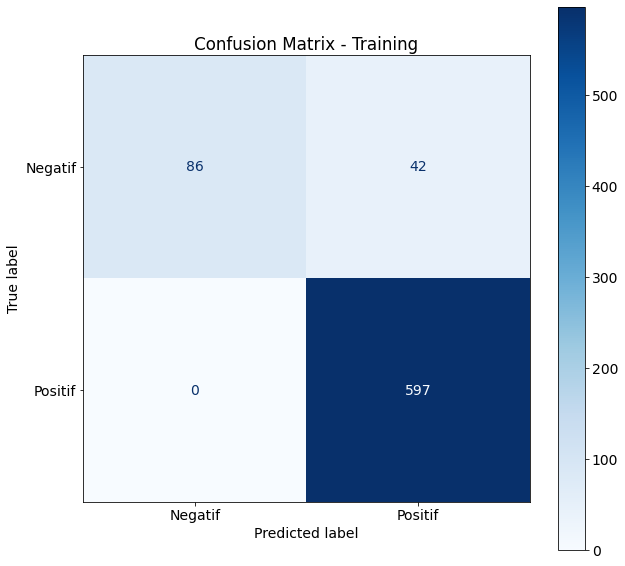

In [ ]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(10,10))
plt.rcParams.update({'font.size': 14})
class_names = ["Negatif", "Positif"]
disp = plot_confusion_matrix(ensemble, x_train, y_train, display_labels=class_names, cmap=plt.cm.Blues, ax=ax)# , normalize='true'
disp.ax_.set_title("Confusion Matrix - Training")
print(disp.confusion_matrix)

In [ ]:
# Compared to training error to make sure overfitting not happening
ensemble_pred = ensemble.predict(x_test)
print(classification_report(y_test, ensemble_pred))

              precision    recall  f1-score   support

          -1       0.33      0.03      0.06        31
           1       0.83      0.99      0.90       151

    accuracy                           0.82       182
   macro avg       0.58      0.51      0.48       182
weighted avg       0.75      0.82      0.76       182

